<hr style="height:2px;border:none"/>
<h1 align='center'> <img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />

INF-395 / 477 / 577 Tarea 1 Redes Neuronales Artificiales - 2020-1 </h1>

<H3 align='center'> Integrantes: Sebastian Muñoz- Guillermo Meza </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en tensorflow, keras, pandas y numpy
* Redes Densas Feed Forward
* Regularización y Dropout
* Exploding & Vanishing Gradient
* Skip Connections
* Learn Rate Decay
* Optimizadores
* Redes Convolucionales
* Image Data Augmentation
* Interpretabilidad CNNs


**Formalidades**  
* Equipos de trabajo de 2 personas (*Ambos estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos). Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno para toda la tarea, con tal de que todos los entregables estén bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_ ( en caso de ser repositorio privado, invitar como colaborador al usuario de github "Aerlio") al correo electrónico del ayudante (*<tomas.ochoa.14@sansano.usm.cl>*), en copia al profesor (*<cvalle@inf.utfsm.cl>*). Especificar el siguiente asunto: [INF395/477/577-2020 Tarea1]
* Fecha de entrega y presentaciones: 13 de Noviembre. Hora límite de entrega: 23:00. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail. 

<hr style="height:2px;border:none"/>

La tarea se divide en tres partes:

[1.](#primero) Conceptos básicos de redes neuronales  <br>
[2.](#segundo) Reconocimiento de lenguaje de señas <br>
[3.](#tercero) Interpretabilidad de CNNs, transfer learning, y skip connections <br>

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo solo son guías y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con comentarios y con celdas _Markdown_ con los comentarios de la pregunta y con cualquier analisis, fórmula o explicación que les parezca relevante para justificar sus procedimientos. 
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará mucho la elección en si, en cambio la argumentación detrás de la elección será lo más ponderado.

**Es ÁLTAMENTE recomendado realizar esta tarea en _Colab_ de Google (https://colab.research.google.com/notebooks/intro.ipynb#recent=true), con el fin de no depender del rendimiento de su computador personal al momento de entrenar redes neuronales y poder compartir de forma fácil sus avances con su compañer@ de trabajo.** Si bien conlleva sus pros y contras utilizar _Colab_ , existirá una curva de aprendizaje personal que lo ayudará a sacar el mayor provecho a esta herramienta, por ejemplo aprendiendo a guardar los avances realizados, evitando tener que ejecutar todo el código cada vez que se abra _Colab_ . *Tip: Una vez abierto un notebook en _Colab_ ir a **entorno de ejecución**->**Cambiar tipo de entorno de ejecución**, y seleccionár TPU como acelerador por hardware para redes feedforward y GPU para redes convolucionales.*.

# 3. Interpretabilidad de CNNs, transfer learning y skip connections

Los modelos de aprendizaje automático, especialmente los modelos de aprendizaje profundo, a menudo se consideran una caja negra y difíciles de interpretar. Bueno, esta afirmación no es completamente cierta ni es completamente falsa. Es un hecho que depurar un modelo de aprendizaje profundo es mucho más difícil que otros modelos de aprendizaje automático, pero hay formas en las que puede obtener información sobre su modelo y, hasta cierto punto, puede ver lo que está sucediendo. Dado que trabajaremos con archivos .jpg mucho código vendrá dado, se darán ejemplos en el camino para que se familiarice con las herramientas sin la necesidad de entenderlas en su totalidad. **¡¡¡¡¡¡Evite trabajar de más y trabaje esta pregunta en _Colab_!!!!!** La gran mayoría del código de pre-procesamiento a utilizar, y ciertos tópicos ha cubrir, han sido sacados de https://www.kaggle.com/aakashnain/what-does-a-cnn-see/notebook , puede ocupar el código para guiarse, sin embargo se ha bajado el código para trabajar con tensorflow directamente. Aprecie que en los datasets de Kaggle, hay una sección notebooks, donde distintos usuarios suben distintas aplicaciones que le han dado al dataset en cuestión.  


<h1 align='center'> <img src="https://miro.medium.com/max/831/1*7Ip2_SeOz_BoruHEytEMlQ.png" width="60%" height="60%" /> </h1> 
<h1 align='center'></h1>

Para esto analizaremos el problema de clasificación de imágenes, en este caso clasificaremos 10 especies de monos, su descripción se puede encontrar en: https://www.kaggle.com/slothkong/10-monkey-species (No es necesario descargar el dataset trabajando en _Colab_). Este dataset será el más pesado que utilizaremos en esta tarea. **Recordar usar entorno de ejecución con acelerador GPU**. Veremos los temas de transfer learning, skip connections, y class activation mappings. Donde la primera herramienta nos ayudará a hacer el entrenamiento más ligero, la segunda nos permitirá atacar tener redes profundas con pesos fijos, y la última nos permetirá visualizar qué está viendo nuestra red CNN.


## 3.a Carga de datos (tan solo insertar datos kaggle, leer código y comentarios para entender la funcionalidad de cada celda).

##### I) Iniciaremos cargando los datos. Para esto necesitará crear una cuenta en kaggle, dirigirse a su perfil, ir a Account, y en la sección API apretar _Create new API token_ , se descargará un archivo kaggle.json, ábralo como archivo de texto y obtenga su username y key. Luego ejecute el siguiente código (desconozco por qué pero a veces hay que ejecutar el código 2 veces para que funcione). Solución obtenida desde el hilo: https://gist.github.com/jayspeidell/d10b84b8d3da52df723beacc5b15cb27

In [2]:
username="gmezap"
key="67c43875aa87b82a44e920689eb419c7"
!pip install -q kaggle
api_token = {"username":username,"key":key}
import json
import zipfile
import os
os.environ['KAGGLE_USERNAME'] = str(username)
os.environ['KAGGLE_KEY'] = str(key)
!kaggle datasets download -d slothkong/10-monkey-species
if not os.path.exists("/content/competitions/monillos"):
    os.makedirs("/content/competitions/monillos")
os.chdir('/content/competitions/monillos')
for file in os.listdir():
    if file[-4:]==".zip":
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()
!ls

 96% 526M/547M [00:02<00:00, 128MB/s]
100% 547M/547M [00:02<00:00, 201MB/s]
10-monkey-species.zip  monkey_labels.txt  training  validation


Ejecute el siguiente código como viene para generar los conjuntos de entrenamiento y validación, en este formato la primera columna indicará el archivo .jpg al que está ligado cada dato, y la columna labels indicará a qué clase pertenece. **Si le aparece un error de directorio volver a ejecutar celda anterior**

In [3]:
from pathlib import Path
import pandas as pd
import cv2
import numpy as np
from keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt

labels_dict= {'n0':0, 'n1':1, 'n2':2, 'n3':3, 'n4':4, 'n5':5, 'n6':6, 'n7':7, 'n8':8, 'n9':9}
training_data = Path('training/training/') 
validation_data = Path('validation/validation/') 
labels_path = Path('monkey_labels.txt')
# Creating a dataframe for the training dataset
train_df = []
for folder in os.listdir(training_data):
    # Define the path to the images
    imgs_path = training_data / folder
    # Get the list of all the images stored in that directory
    imgs = sorted(imgs_path.glob('*.jpg'))
    # Store each image path and corresponding label 
    for img_name in imgs:
        train_df.append((str(img_name), labels_dict[folder]))
train_df = pd.DataFrame(train_df, columns=['image', 'label'], index=None)
# shuffle the dataset 
train_df = train_df.sample(frac=1.).reset_index(drop=True)

# Creating dataframe for validation data in a similar fashion
valid_df = []
for folder in os.listdir(validation_data):
    imgs_path = validation_data / folder
    imgs = sorted(imgs_path.glob('*.jpg'))
    for img_name in imgs:
        valid_df.append((str(img_name), labels_dict[folder]))

        
valid_df = pd.DataFrame(valid_df, columns=['image', 'label'], index=None)
# shuffle the dataset 
valid_df = valid_df.sample(frac=1.).reset_index(drop=True)

OpenCV es una poderosa herramienta para computer vision:

_OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in the commercial products. Being a BSD-licensed product, OpenCV makes it easy for businesses to utilize and modify the code._

Procederemos a visualizar una imagen del dataset al azar. Familiarícese con las f° a utilizar

In [4]:
# dimensions to consider for the images
img_rows, img_cols, img_channels = 224,224,3

# batch size for training  
batch_size=8

# total number of classes in the dataset
nb_classes=10

Como podrá inferir en base a la imágen mostrada, el dataset es muy pesado, por lo cual en lugar de trabajar directamente con un dataframe con los pixeles de la imágen, como en la pregunta 2, trabajaremos con la siguiente función.

In [5]:
from keras.utils import to_categorical
def data_generator(data, batch_size, is_validation_data=False):
    # Get total number of samples in the data
    n = len(data)
    nb_batches = int(np.ceil(n/batch_size))

    # Get a numpy array of all the indices of the input data
    indices = np.arange(n)
    
    # Define two numpy arrays for containing batch data and labels
    batch_data = np.zeros((batch_size, img_rows, img_cols, img_channels), dtype=np.float32)
    batch_labels = np.zeros((batch_size, nb_classes), dtype=np.float32)
    while True:
        if not is_validation_data:
            # shuffle indices for the training data
            np.random.shuffle(indices)
            
        for i in range(nb_batches):
            # get the next batch 
            next_batch_indices = indices[i*batch_size:(i+1)*batch_size]
            
            # process the next batch
            for j, idx in enumerate(next_batch_indices):
                img = cv2.imread(data.iloc[idx]["image"])
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                label = data.iloc[idx]["label"]
                img = cv2.resize(img, (img_rows, img_cols)).astype(np.float32)
                batch_data[j] = img
                batch_labels[j] = to_categorical(label,num_classes=nb_classes)
            
            batch_data = preprocess_input(batch_data)
            yield batch_data, batch_labels

In [6]:
#training data generator 
train_data_gen = data_generator(train_df, batch_size)

# validation data generator 
valid_data_gen = data_generator(valid_df, batch_size, is_validation_data=True)

##### II) Visualice una imágen para cada clase de mono indicado su raza. Básese en el siguiente código.

OpenCV es una poderosa herramienta para computer vision:

_OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in the commercial products. Being a BSD-licensed product, OpenCV makes it easy for businesses to utilize and modify the code._

Procederemos a visualizar una imagen del dataset al azar. Familiarícese con las f° a utilizar

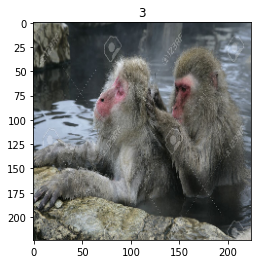

In [7]:
idx= np.random.randint(100) # <- random number
sample_image = cv2.imread(valid_df.iloc[idx]['image']) #read image from validation set
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB) #set color
sample_image = cv2.resize(sample_image, (img_rows, img_cols)) #resize, because .jpg images are from diferent size
sample_label = valid_df.iloc[idx]["label"] #get label
sample_image_processed = np.expand_dims(sample_image, axis=0) #not used here, but to transform image from (pixel,pixel,canal) to (obs, pixel, pixel, canal)
sample_image_processed = preprocess_input(sample_image_processed) #transformation for vgg16
plt.title(sample_label)
plt.imshow(sample_image)
plt.show()

## 3.b Transfer learning

El aprendizaje por transferencia es un método de aprendizaje automático en el que un modelo desarrollado para una tarea se reutiliza como punto de partida para un modelo en una segunda tarea.

Es un enfoque popular en el aprendizaje profundo en el que los modelos previamente entrenados se utilizan como punto de partida en la visión por computadora y las tareas de procesamiento del lenguaje natural, dada la gran cantidad de recursos informáticos y de tiempo necesarios para desarrollar modelos de redes neuronales sobre estos problemas y los enormes saltos en las habilidades que proporcionan sobre problemas relacionados. El concepto de transfer learning abarca más que este tipo de implementación en específico, p.ej, en el área de reinforcement learning se le puede llamar transfer learning al hecho de utilizar demostraciones humanas para ayudar a una red neuronal a resolver un _task_ o _multi-task_ en específico.

<h1 align='center'> <img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png" width="60%" height="60%" /> </h1> 
<h1 align='center'> VGG16 </h1> 

Para este item utilizaremos la red vgg16 como red base (info: https://neurohive.io/en/popular-networks/vgg16/) desarrollada por Oxford.

##### I) Procederemos a obtener la red VGG16 desde keras.applications, retirar su arquitectura densa, congelar sus pesos, y añadir una capa densa propia entrenable.

In [8]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dropout,Dense,Flatten
from keras.optimizers import RMSprop
from keras.callbacks import History, EarlyStopping
import tensorflow as tf
from keras.applications.vgg16 import preprocess_input
tf.keras.backend.clear_session()
tf.compat.v1.disable_eager_execution()

base_model = VGG16(input_shape=(img_rows, img_cols, img_channels), weights='imagenet', include_top=True)
#  get the output of the last layer
base_model_output = base_model.layers[-2].output
# # add new layers 
x = Dropout(0.7)(base_model_output)
output = Dense(10, activation='softmax')(x)
# define a new model 
model = tf.keras.models.Model(base_model.input, output)
# # Freeze all the base model layers
for layer in base_model.layers[:-1]:
    layer.trainable=False
my_callbacks = [History(), # Returns validation and training loss
    EarlyStopping(patience=2,monitor="val_accuracy", #Stops training when the validation loss doesnt get better in n°patience consecutive epochs
                                     restore_best_weights=True)]
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(1e-3), metrics=['accuracy'])

553467904/553467096 [==============================] - 6s 0us/step


In [9]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [10]:
# number of training and validation steps for training and validation
nb_train_steps = int(np.ceil(len(train_df)/batch_size))
nb_valid_steps = int(np.ceil(len(valid_df)/batch_size))
# number of epochs 
nb_epochs=3

hist = model.fit(train_data_gen,      # ¿Demasiado lento?, revisar estar usando entorno de ejecución en modo GPU. Debiese demorarse aprox. 40 secs por epoch. Dejar verbose
                                          # para seguir el entrenamiento, esto tomará su tiempo en comparación con las demás secciones.
                              epochs=nb_epochs, 
                              steps_per_epoch=nb_train_steps, 
                              validation_data=valid_data_gen, 
                              validation_steps=nb_valid_steps,
                              callbacks=my_callbacks)

Epoch 1/3
137/137 [==============================] - ETA: 0s - batch: 68.0000 - size: 8.0000 - loss: 1.7392 - accuracy: 0.6770WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
137/137 [==============================] - 36s 264ms/step - batch: 68.0000 - size: 8.0000 - loss: 1.7392 - accuracy: 0.6770 - val_loss: 0.1395 - val_accuracy: 0.9706
Epoch 2/3
137/137 [==============================] - 36s 264ms/step - batch: 68.0000 - size: 8.0000 - loss: 0.4749 - accuracy: 0.8996 - val_loss: 0.1074 - val_accuracy: 0.9743
Epoch 3/3
137/137 [==============================] - 36s 261ms/step - batch: 68.0000 - size: 8.0000 - loss: 0.2573 - accuracy: 0.9544 - val_loss: 0.1390 - val_accuracy: 0.9779


##### II) Grafique los errores y accuracy de entrenamiento y validación a lo largo de los epochs. **Comente**

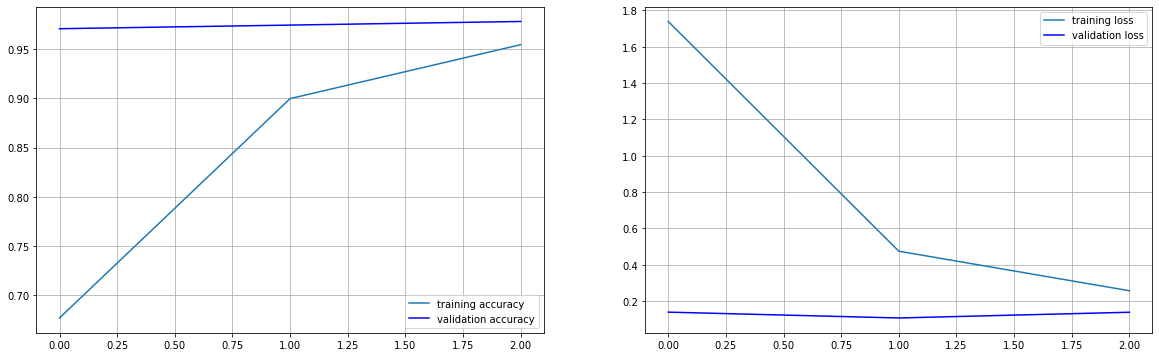

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 6
plt.subplot(1,2,1)
plt.plot(hist.history["accuracy"],label="training accuracy")
plt.plot(hist.history["val_accuracy"],"b",label="validation accuracy")
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist.history["loss"],label="training loss")
plt.plot(hist.history["val_loss"],"b", label="validation loss")
plt.grid()
plt.legend()

###Respuesta

Conseguimos un muy buen accuracy en 3 epochs. Esto se logró al reutilizar el modelo base y entrenando una cantidad relativamente pequeña de parametros.(los de la capa añadida)

Hay que notar que respecto a la pregunta 2, para este proceso en entrenamiento se requiere de muy pocos epochs en comparación.
Ademas, el error de validacion es bastante bajo luego de los 3 epochs.

Hay indicios de sobreajuste si es que se aumenta la cantidad de epochs.

##### III) **(Las preguntas de este ítem 2.b se tendrán que volver a implementar para futuras preguntas)** 

Realice la visualización del input (con título predicted label y true label), Class Activation Map (con título del label y salida de la red correspondiente), y superposición de input y CAM correspondiente al predicted label. **Deberá** modificar el código para obtener lo solicitado para 10 entradas distintas (1 para cada clase de mono) y su CAM para cada una de las 10 clases de monos. En total para cada clase de mono deberá obtener: 1 imágen de entrada de la clase de mono en cuestión, 10 CAM una para cada neurona del output de la red, y 1 superposición de la imágen de entrada y el CAM correspondiente a la predicción (por lo tanto, 120 imágenes en total). **Las imágenes tienen que ser claras, cada una de tamaño semejante a las que entrega el siguiente código.** Ocupe su herramienta gráfica preferida.

Apoyándose de las visualizaciones responda todas las preguntas siguientes:

**1) ¿Qué es CAM?, ¿Cómo nos ayuda a entender la visualización de nuestra CNN?** Puede limitarse a responder con la información entregada en el artículo https://medium.com/@GaganaB/class-activation-maps-551477720679 (si es que se le acabaron las visitas a medium, puede entrar en modo incógnito de manera ilimitada) y en el video https://www.youtube.com/watch?v=vTY58-51XZA&ab_channel=LazyProgrammer

**2) ¿Dónde se enfoca la red para verificar a qué clase de mono pertenece la imágen? ¿Qué estrategia asume la red para reconocer cada clase de mono?** 

** 1.- **  Una CAM es un metodo de visualizacion del comportamiento de aprendizaje de una red neuronal, mediante el promedio ponderado de la última capa convolucional. Nos ayuda a reconocer las partes que la CNN considera clave al momento de clasificar las clases. 

** 2.- **  Suele enfocarse ya sea en la forma y rasgos faciales de los monos.

In [13]:
plt.rcParams["figure.figsize"]=[20,8]
from keras import backend as K

# get random image, true label, and predicted label
idx= np.random.randint(100) # <- random number



def monos_cam(idx):
  true_label=valid_df.iloc[idx]['label']
  ####### VISUALIZACIÓN INPUT
  sample_image = cv2.imread(valid_df.iloc[idx]['image'])
  sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
  sample_image = cv2.resize(sample_image, (img_rows, img_cols))
  sample_label = valid_df.iloc[idx]["label"]
  sample_image_processed = np.expand_dims(sample_image, axis=0)
  sample_image_processed = preprocess_input(sample_image_processed)
  predicted_label=np.argmax(model.predict(sample_image_processed), axis=-1)[0]
  rcParams["figure.figsize"] = 18, 16
  plt.subplot(3,4,1)
  plt.title("Predicted label: "+str(predicted_label)+"\n True label: "+str(true_label))
  plt.imshow(sample_image)# <- Image is ready to plot

  ##### Visualización CAM
  heatmaps=[]
  kk=0
  predicted_label=np.argmax(model.predict(sample_image_processed), axis=-1)[0] #repeated for clearness
  for k in range(10):
    predicted_output = model.output[:, k]
    # choose the last conv layer in your model
    last_conv_layer = model.get_layer('block5_conv3') #<....... you'll need to look what's the name of the last conv model.summary())
    grads = K.gradients(predicted_output, last_conv_layer.output)[0] #predicted output=loss, last_conv_layer=input al gradiente, ¿qué calculará el gradiente entonces?
    # take mean gradient per feature map
    grads = K.mean(grads, axis=(0,1,2))
    # Define a function that generates the values for the output and gradients
    evaluation_function = K.function([model.input], [grads, last_conv_layer.output[0]]) #en eager executions disabled estamos trabajando con tensores continuamente, 
                                                                                        # si siguen el código se darán cuenta que evaluation function mantiene 
                                                                                        # las definiciones de variables
    # get the values
    grads_values, conv_ouput_values = evaluation_function([sample_image_processed]) #run evaluation function
    # iterate over each feature map in yout conv output and multiply
    # the gradient values with the conv output values. This gives an 
    # indication of "how important a feature is"
    for i in range(conv_ouput_values.shape[-1]): # we have 512 features in our last conv layer
        conv_ouput_values[:,:,i] *= grads_values[i]
    # create a heatmap
    heatmap = np.mean(conv_ouput_values, axis=-1)
    # remove negative values
    heatmap = np.maximum(heatmap, 0)
    # re-scale
    heatmap /= heatmap.max()
    # get the heatmap for class activation map(CAM)
    heatmap = cv2.resize(heatmap, (sample_image.shape[0], sample_image.shape[1]))
    heatmap = heatmap *255
    heatmap = np.clip(heatmap, 0, 255).astype(np.uint8)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    plt.subplot(3,4,2+kk)
    plt.title("CAM for class:"+ str(k)+"\n output:"+str(np.round(model.predict(sample_image_processed)[0,k],2)*100)+"%")
    plt.imshow(heatmap)# <- Image is ready to plot
    kk+=1
    heatmaps.append(heatmap) # <- correct it
  # get the superimposed image
  super_imposed_image = heatmaps[predicted_label] * 0.5 + sample_image #<- correct it  
  super_imposed_image = np.clip(super_imposed_image, 0,255).astype(np.uint8)
  plt.subplot(3,4,12)
  plt.title("Superimposed image")
  plt.imshow(super_imposed_image)# <- Image is ready to plot
  plt.show()

In [14]:
# lista con un indice de un mono de cada clase de manera aleatoria
monos=[]
c=0
while c<10:
  idx= np.random.randint(100) # <- random number
  if valid_df.iloc[idx]["label"]==c:
    monos.append(idx)
    c+=1

In [15]:
for mono in monos:
  monos_cam(mono)

Output hidden; open in https://colab.research.google.com to view.

##### IV) **(Las preguntas de este ítem 2.b se tendrán que volver a implementar para futuras preguntas)** Visualice los feature maps de **todas** las capas convolucionales del modelo para una entrada de su elección (mantenga el id de esta imágen para cuando tenga que visualizar nuevamente en 3.c y 3.d). Apóyese en el siguiente código que las genera para la primera capa. 

**Pregunta:** ¿Cómo se relaciona esta información respecto a lo que nos entrega CAM? ¿Qué feature map ocupa CAM para construirse?

Cam utiliza los feature map de la última convolución para construirse. Como la ultima convolución depende de los resultados de capas convolucionales anteriores, CAM está relacionado hasta cierto punto con todas las convoluciones de la red de forma indirecta.

In [16]:
# get random image, SELECCIONE UNA A GUSTO
# idx= np.random.randint(100) # <- random number
idx= monos[4]
true_label=valid_df.iloc[idx]['label']
####### VISUALIZACIÓN INPUT
sample_image = cv2.imread(valid_df.iloc[idx]['image'])
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
sample_image = cv2.resize(sample_image, (img_rows, img_cols))
sample_label = valid_df.iloc[idx]["label"]
sample_image_processed = np.expand_dims(sample_image, axis=0)
sample_image_processed = preprocess_input(sample_image_processed)

In [17]:
import keras
from keras.models import Sequential
def get_n_layers(max_layer, original_model):
  truncated_model = Sequential()
  for layer in range(max_layer): #first is the input
    truncated_model.add(original_model.get_layer(index=layer))
  # truncated_model.summary()
  return truncated_model

In [18]:
for index,layer in enumerate(model.layers):
  if isinstance(layer,keras.layers.Conv2D):
    fm_size=layer.output.shape[2] # largo de la imagen
    fm_num=layer.output.shape[3] # cantidad de feature maps de la imagen
    fm_largo=int(np.ceil(np.sqrt(fm_num)))
    print("Capa convolucional "+str(index+1))
    vis_model=get_n_layers(index+1,model)
    fet_maps_stacked=vis_model.predict(sample_image_processed)[0,:,:,:]
    feature_maps=np.zeros((fm_size*8,fm_size*8))
    k=0
    for i in range(8):
      for j in range(8):
        feature_map = fet_maps_stacked[:,:,k]
        feature_map -= feature_map.mean()
        feature_map /= feature_map.std()
        feature_map *=255
        feature_map = np.clip(feature_map, 0, 255).astype(np.uint8)
        feature_maps[fm_size*i:fm_size*(i+1),fm_size*j:fm_size*(j+1)]=feature_map
        k+=1
    plt.subplot(1,2,1)
    plt.title("Predicted label: "+str(np.argmax(model.predict(sample_image_processed), axis=-1)[0])+"\n True label: "+str(true_label))
    plt.imshow(sample_image)# <- Image is ready to plot
    plt.subplot(1,2,2)
    plt.title("Feature maps capa convolucional: "+str(index+1))
    plt.imshow(feature_maps)
    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

## 3.c Transfer learning parte II
I) **Repetir los puntos I) a IV) de la sección anterior** usando como red base VGG19 (Si es que desea utilizar otra no hay problema, visitar: https://keras.io/api/applications/). Para la visualización de CAM y feature maps, use las mismas imágenes de entrada para mejor comparación.


**A partir de los resultados responda: ¿Cómo cambió la estrategia de esta red respecto a la del punto anterior?**

###Respuesta

A partir de los CAM y feature maps extraidos, se puede decir que la red usa una estrategia similar para reconocer las clases de monos (reconoce sus gestos faciales), pero además, ahora pondera mucho mas la forma y silueta de los inputs.

Los resultados del accuracy y errores se mantienen respecto al modelo anterior.

### Importacion y compilacion del modelo

In [19]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
tf.keras.backend.clear_session()
tf.compat.v1.disable_eager_execution()

base_model = VGG19(input_shape=(img_rows, img_cols, img_channels), weights='imagenet', include_top=True)
#  get the output of the last layer
base_model_output = base_model.layers[-2].output
# # add new layers 
x = Dropout(0.7)(base_model_output)
output = Dense(10, activation='softmax')(x)
# define a new model 
model = tf.keras.models.Model(base_model.input, output)
# # Freeze all the base model layers
for layer in base_model.layers[:-1]:
    layer.trainable=False
my_callbacks = [History(), # Returns validation and training loss
    EarlyStopping(patience=2,monitor="val_accuracy", #Stops training when the validation loss doesnt get better in n°patience consecutive epochs
                                     restore_best_weights=True)]
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(1e-3), metrics=['accuracy'])

574717952/574710816 [==============================] - 4s 0us/step


In [20]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

### Entrenamiento

In [21]:
# number of training and validation steps for training and validation
nb_train_steps = int(np.ceil(len(train_df)/batch_size))
nb_valid_steps = int(np.ceil(len(valid_df)/batch_size))
# number of epochs 
nb_epochs=3

hist = model.fit(train_data_gen,    
                epochs=nb_epochs, 
                steps_per_epoch=nb_train_steps, 
                validation_data=valid_data_gen, 
                validation_steps=nb_valid_steps,
                callbacks=my_callbacks)

Epoch 1/3
137/137 [==============================] - 38s 275ms/step - batch: 68.0000 - size: 8.0000 - loss: 1.3505 - accuracy: 0.7016 - val_loss: 0.1663 - val_accuracy: 0.9485
Epoch 2/3
137/137 [==============================] - 37s 267ms/step - batch: 68.0000 - size: 8.0000 - loss: 0.4238 - accuracy: 0.9170 - val_loss: 0.0868 - val_accuracy: 0.9743
Epoch 3/3
137/137 [==============================] - 36s 260ms/step - batch: 68.0000 - size: 8.0000 - loss: 0.2853 - accuracy: 0.9453 - val_loss: 0.1154 - val_accuracy: 0.9706


### Graficos de error y accuracy

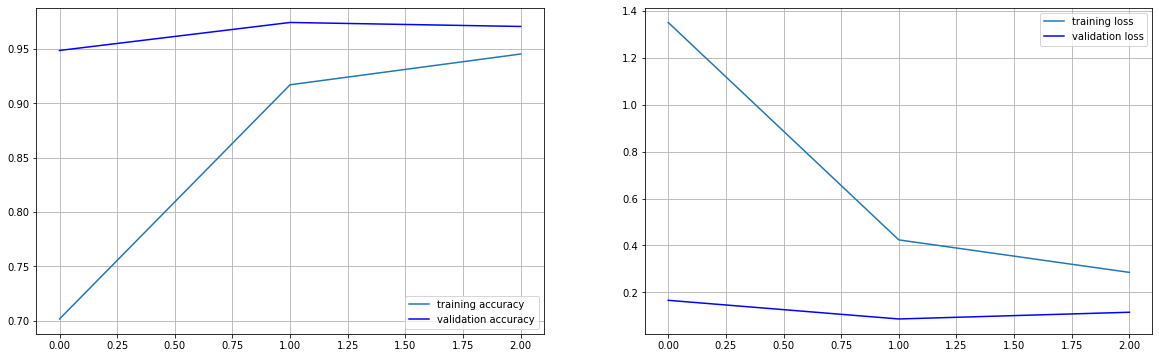

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 6
plt.subplot(1,2,1)
plt.plot(hist.history["accuracy"],label="training accuracy")
plt.plot(hist.history["val_accuracy"],"b",label="validation accuracy")
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist.history["loss"],label="training loss")
plt.plot(hist.history["val_loss"],"b", label="validation loss")
plt.grid()
plt.legend()

### CAM

In [23]:
for mono in monos:
  idx=mono
  true_label=valid_df.iloc[idx]['label']
  ####### VISUALIZACIÓN INPUT
  sample_image = cv2.imread(valid_df.iloc[idx]['image'])
  sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
  sample_image = cv2.resize(sample_image, (img_rows, img_cols))
  sample_label = valid_df.iloc[idx]["label"]
  sample_image_processed = np.expand_dims(sample_image, axis=0)
  sample_image_processed = preprocess_input(sample_image_processed)
  predicted_label=np.argmax(model.predict(sample_image_processed), axis=-1)[0]
  rcParams["figure.figsize"] = 18, 16
  plt.subplot(3,4,1)
  plt.title("Predicted label: "+str(predicted_label)+"\n True label: "+str(true_label))
  plt.imshow(sample_image)# <- Image is ready to plot

  ##### Visualización CAM
  heatmaps=[]
  kk=0
  predicted_label=np.argmax(model.predict(sample_image_processed), axis=-1)[0] #repeated for clearness
  for k in range(10):
    predicted_output = model.output[:, k]
    # choose the last conv layer in your model
    last_conv_layer = model.get_layer('block5_conv4') #<....... you'll need to look what's the name of the last conv model.summary())
    grads = K.gradients(predicted_output, last_conv_layer.output)[0] #predicted output=loss, last_conv_layer=input al gradiente, ¿qué calculará el gradiente entonces?
    # take mean gradient per feature map
    grads = K.mean(grads, axis=(0,1,2))
    # Define a function that generates the values for the output and gradients
    evaluation_function = K.function([model.input], [grads, last_conv_layer.output[0]]) #en eager executions disabled estamos trabajando con tensores continuamente, 
                                                                                        # si siguen el código se darán cuenta que evaluation function mantiene 
                                                                                        # las definiciones de variables
    # get the values
    grads_values, conv_ouput_values = evaluation_function([sample_image_processed]) #run evaluation function
    # iterate over each feature map in yout conv output and multiply
    # the gradient values with the conv output values. This gives an 
    # indication of "how important a feature is"
    for i in range(conv_ouput_values.shape[-1]): # we have 512 features in our last conv layer
        conv_ouput_values[:,:,i] *= grads_values[i]
    # create a heatmap
    heatmap = np.mean(conv_ouput_values, axis=-1)
    # remove negative values
    heatmap = np.maximum(heatmap, 0)
    # re-scale
    heatmap /= heatmap.max()
    # get the heatmap for class activation map(CAM)
    heatmap = cv2.resize(heatmap, (sample_image.shape[0], sample_image.shape[1]))
    heatmap = heatmap *255
    heatmap = np.clip(heatmap, 0, 255).astype(np.uint8)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    plt.subplot(3,4,2+kk)
    plt.title("CAM for class:"+ str(k)+"\n output:"+str(np.round(model.predict(sample_image_processed)[0,k],2)*100)+"%")
    plt.imshow(heatmap)# <- Image is ready to plot
    kk+=1
    heatmaps.append(heatmap) # <- correct it
  # get the superimposed image
  super_imposed_image = heatmaps[predicted_label] * 0.5 + sample_image #<- correct it  
  super_imposed_image = np.clip(super_imposed_image, 0,255).astype(np.uint8)
  plt.subplot(3,4,12)
  plt.title("Superimposed image")
  plt.imshow(super_imposed_image)# <- Image is ready to plot
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Featured Maps

In [24]:
# get random image, SELECCIONE UNA A GUSTO
# idx= np.random.randint(100) # <- random number
idx=monos[4]
true_label=valid_df.iloc[idx]['label']
####### VISUALIZACIÓN INPUT
sample_image = cv2.imread(valid_df.iloc[idx]['image'])
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
sample_image = cv2.resize(sample_image, (img_rows, img_cols))
sample_label = valid_df.iloc[idx]["label"]
sample_image_processed = np.expand_dims(sample_image, axis=0)
sample_image_processed = preprocess_input(sample_image_processed)

for index,layer in enumerate(model.layers):
  if isinstance(layer,keras.layers.Conv2D):
    fm_size=layer.output.shape[2] # largo de la imagen
    fm_num=layer.output.shape[3] # cantidad de feature maps de la imagen
    fm_largo=int(np.ceil(np.sqrt(fm_num)))
    print("Capa "+str(index+1))
    vis_model=get_n_layers(index+1,model)
    fet_maps_stacked=vis_model.predict(sample_image_processed)[0,:,:,:]
    feature_maps=np.zeros((fm_size*8,fm_size*8))
    k=0
    for i in range(8):
      for j in range(8):
        feature_map = fet_maps_stacked[:,:,k]
        feature_map -= feature_map.mean()
        feature_map /= feature_map.std()
        feature_map *=255
        feature_map = np.clip(feature_map, 0, 255).astype(np.uint8)
        feature_maps[fm_size*i:fm_size*(i+1),fm_size*j:fm_size*(j+1)]=feature_map
        k+=1
    plt.subplot(1,2,1)
    plt.title("Predicted label: "+str(np.argmax(model.predict(sample_image_processed), axis=-1)[0])+"\n True label: "+str(true_label))
    plt.imshow(sample_image)# <- Image is ready to plot
    plt.subplot(1,2,2)
    plt.title("Feature maps capa: "+str(index+1))
    plt.imshow(feature_maps)
    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

## 3.d CNN con skip connections

Otra manera de mejorar los resultados de las redes, sobretodo de las redes profundas donde se observa el problema de _vanishing gradient_ son las relativamente nuevas _skip connections_ o redes residuales. En vez de preocuparse de cómo manejar los pesos de la red para permitir que el gradiente no explote o no desaparezca, se permite al gradiente "pasar" sin ser modificado, agregando conecciones con pesos fijos entre capas de distintas profundidades, en la práctica permitiendo a la señar "saltarse" las capas intermedias. Esta idea ha permitido desarrollos como los de ResNet, llegando a profundidades de cientos de capas y aún logrando aprendizaje. 

Basandose en el código mostrado abajo, implemente una ResNet de su gusto. _Tip: Utilice BatchNormalization después de cada capa convolucional._

**Obtenga un error de validación superior al 50%**. _No tenga miedo de subir la profundidad, pero sí de la cantidad de hiperparámetros a entrenar, checkear model.summary()_

**Repita los pasos II) a IV) de las secciones anteriores. Comente**

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input, concatenate
from keras.optimizers import RMSprop
from keras.callbacks import History, EarlyStopping
from keras.layers.normalization import BatchNormalization
tf.keras.backend.clear_session()
tf.compat.v1.disable_eager_execution()

x = Input(shape=(img_rows, img_cols, img_channels))

y = Conv2D(64, (3,3),padding='same',activation='relu')(x)
y = BatchNormalization()(y)
y = Conv2D(64, (3,3),padding='same',activation='relu')(y)
y = BatchNormalization()(y)
z = concatenate([x, y])

for i in range(5):
  z = MaxPooling2D(pool_size=(2, 2))(z)

  y = Conv2D(64, (3,3),padding='same',activation='relu')(z)
  y = BatchNormalization()(y)
  y = Conv2D(64, (3,3),padding='same',activation='relu')(y)
  y = BatchNormalization()(y)
  z = concatenate([z, y])

z = Flatten()(z)
z = Dense(256 + 64, activation='relu')(z)
z = BatchNormalization()(z)
out = Dense(10, activation='softmax')(z)

res_mod = tf.keras.models.Model(x,out)

my_callbacks = [History(), # Returns validation and training loss
    EarlyStopping(patience=2,monitor="val_accuracy", #Stops training when the validation loss doesnt get better in n°patience consecutive epochs,keep it at 100 it's only to show u
                                     restore_best_weights=True)]


optimizer = RMSprop(0.001)
res_mod.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# summary
res_mod.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 224, 224, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 64) 36928       batch_normalization[0][0]        
_______________________________________________________________________________________

### Entrenamiento

In [26]:
# number of training and validation steps for training and validation
nb_train_steps = int(np.ceil(len(train_df)/batch_size))
nb_valid_steps = int(np.ceil(len(valid_df)/batch_size))
# number of epochs 
nb_epochs=5 # si no obtuvo el resultado deseado en 10 epochs 

hist = res_mod.fit(train_data_gen,     
                    epochs=nb_epochs, 
                    steps_per_epoch=nb_train_steps, 
                    validation_data=valid_data_gen, 
                    validation_steps=nb_valid_steps,
                    callbacks=my_callbacks)

Epoch 1/5
137/137 [==============================] - 39s 284ms/step - batch: 68.0000 - size: 8.0000 - loss: 1.7580 - accuracy: 0.4279 - val_loss: 3.8395 - val_accuracy: 0.2316
Epoch 2/5
137/137 [==============================] - 40s 290ms/step - batch: 68.0000 - size: 8.0000 - loss: 1.3442 - accuracy: 0.5557 - val_loss: 1.3171 - val_accuracy: 0.5294
Epoch 3/5
137/137 [==============================] - 37s 272ms/step - batch: 68.0000 - size: 8.0000 - loss: 1.0700 - accuracy: 0.6651 - val_loss: 1.2904 - val_accuracy: 0.5809
Epoch 4/5
137/137 [==============================] - 39s 281ms/step - batch: 68.0000 - size: 8.0000 - loss: 0.9513 - accuracy: 0.7099 - val_loss: 1.3866 - val_accuracy: 0.5588
Epoch 5/5
137/137 [==============================] - 39s 285ms/step - batch: 68.0000 - size: 8.0000 - loss: 0.7285 - accuracy: 0.7929 - val_loss: 1.2246 - val_accuracy: 0.6066


### Gráficos de error y acuraccy

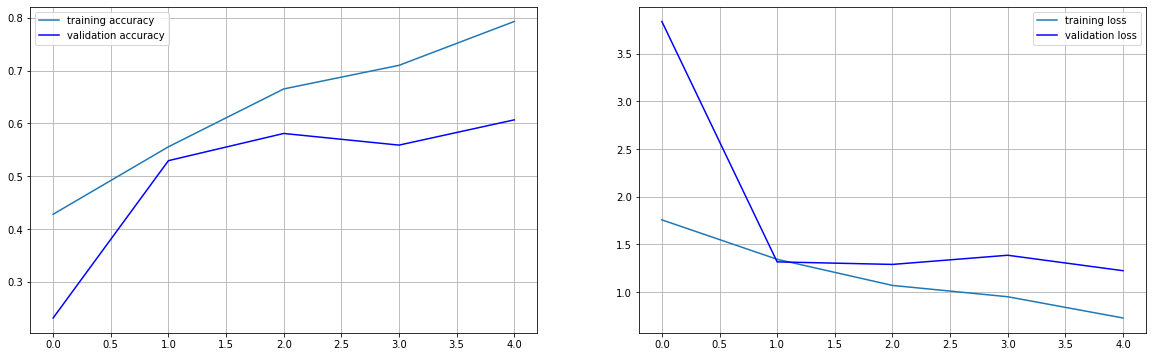

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 6
plt.subplot(1,2,1)
plt.plot(hist.history["accuracy"],label="training accuracy")
plt.plot(hist.history["val_accuracy"],"b",label="validation accuracy")
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist.history["loss"],label="training loss")
plt.plot(hist.history["val_loss"],"b", label="validation loss")
plt.grid()
plt.legend()

###Comentario

Los errores aumentan considerablemente al no usar modelos pre entrenados. Tambien queda la duda si usando más epochs ek validation loss podría mejorar sin sobreajustar, lo cual parece poco factible.

Una de las  causas del bajo accuracy se puede deber a la baja cantidad de imagenes usadas para clasificar la red desde 0.
Otra causa puede ser la baja cantidad de epochs, considerando que todos los parametros de la red comienzan inicializados de forma uniforme por defecto.

### CAM

In [28]:
for mono in monos:
  idx=mono
  true_label=valid_df.iloc[idx]['label']
  ####### VISUALIZACIÓN INPUT
  sample_image = cv2.imread(valid_df.iloc[idx]['image'])
  sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
  sample_image = cv2.resize(sample_image, (img_rows, img_cols))
  sample_label = valid_df.iloc[idx]["label"]
  sample_image_processed = np.expand_dims(sample_image, axis=0)
  sample_image_processed = preprocess_input(sample_image_processed)
  predicted_label=np.argmax(res_mod.predict(sample_image_processed), axis=-1)[0]
  rcParams["figure.figsize"] = 18, 16
  plt.subplot(3,4,1)
  plt.title("Predicted label: "+str(predicted_label)+"\n True label: "+str(true_label))
  plt.imshow(sample_image)# <- Image is ready to plot

  ##### Visualización CAM
  heatmaps=[]
  kk=0
  predicted_label=np.argmax(res_mod.predict(sample_image_processed), axis=-1)[0] #repeated for clearness
  for k in range(10):
    predicted_output = res_mod.output[:, k]
    # choose the last conv layer in your model
    last_conv_layer = res_mod.get_layer('conv2d_11') #<....... you'll need to look what's the name of the last conv model.summary())
    grads = K.gradients(predicted_output, last_conv_layer.output)[0] #predicted output=loss, last_conv_layer=input al gradiente, ¿qué calculará el gradiente entonces?
    # take mean gradient per feature map
    grads = K.mean(grads, axis=(0,1,2))
    # Define a function that generates the values for the output and gradients
    evaluation_function = K.function([res_mod.input], [grads, last_conv_layer.output[0]]) #en eager executions disabled estamos trabajando con tensores continuamente, 
                                                                                        # si siguen el código se darán cuenta que evaluation function mantiene 
                                                                                        # las definiciones de variables
    # get the values
    grads_values, conv_ouput_values = evaluation_function([sample_image_processed]) #run evaluation function
    # iterate over each feature map in yout conv output and multiply
    # the gradient values with the conv output values. This gives an 
    # indication of "how important a feature is"
    for i in range(conv_ouput_values.shape[-1]): # we have 512 features in our last conv layer
        conv_ouput_values[:,:,i] *= grads_values[i]
    # create a heatmap
    heatmap = np.mean(conv_ouput_values, axis=-1)
    # remove negative values
    heatmap = np.maximum(heatmap, 0)
    # re-scale
    heatmap /= heatmap.max()
    # get the heatmap for class activation map(CAM)
    heatmap = cv2.resize(heatmap, (sample_image.shape[0], sample_image.shape[1]))
    heatmap = heatmap *255
    heatmap = np.clip(heatmap, 0, 255).astype(np.uint8)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    plt.subplot(3,4,2+kk)
    plt.title("CAM for class:"+ str(k)+"\n output:"+str(np.round(res_mod.predict(sample_image_processed)[0,k],2)*100)+"%")
    plt.imshow(heatmap)# <- Image is ready to plot
    kk+=1
    heatmaps.append(heatmap) # <- correct it
  # get the superimposed image
  super_imposed_image = heatmaps[predicted_label] * 0.5 + sample_image #<- correct it  
  super_imposed_image = np.clip(super_imposed_image, 0,255).astype(np.uint8)
  plt.subplot(3,4,12)
  plt.title("Superimposed image")
  plt.imshow(super_imposed_image)# <- Image is ready to plot
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

###Comentarios
Vemos claramente que la red aun no puede separar bien la imagen de los monos del entorno que los rodea (manchones azules más aleatorios, no enfocados en la cara). Por esta razón, no se ve una estrategia clara de reconocimiento, y varios CAM para disitntas clases consideran gran parte de la imagen (mono + background) para tomar una desición, lo cual claramente, dificulta el trabajo de la red densa, la cual encuentra patrones de los monos y el entorno.

Tambien se ve el caso contrario, donde se skipeo el último bloque convolucional, y la red considera la totalidad de la imagen para reconocer patrones.

Los manchones verdes en los cam indican que la red no está 100% segura de considerar o no considerar esos pixeles como importanes o relevantes.

### Featured Maps

In [29]:
def get_n_layers_res(max_layer, original_model):
  max_layer-=1
  Input = original_model.get_layer(index=0).output
  Output = original_model.get_layer(index=max_layer).output
  new_mod = tf.keras.models.Model(Input,Output)
  # new_mod.summary()
  return new_mod

In [30]:
import keras
# get random image, SELECCIONE UNA A GUSTO
# idx= np.random.randint(100) # <- random number
idx=monos[4]
true_label=valid_df.iloc[idx]['label']
####### VISUALIZACIÓN INPUT
sample_image = cv2.imread(valid_df.iloc[idx]['image'])
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
sample_image = cv2.resize(sample_image, (img_rows, img_cols))
sample_label = valid_df.iloc[idx]["label"]
sample_image_processed = np.expand_dims(sample_image, axis=0)
sample_image_processed = preprocess_input(sample_image_processed)

for index,layer in enumerate(res_mod.layers):
  if isinstance(layer,keras.layers.Conv2D):
    fm_size=layer.output.shape[2] # largo de la imagen
    fm_num=layer.output.shape[3] # cantidad de feature maps de la imagen
    fm_largo=int(np.ceil(np.sqrt(fm_num)))
    print("Capa "+str(index+1))
    vis_model=get_n_layers_res(index+1,res_mod)
    fet_maps_stacked=vis_model.predict(sample_image_processed)[0,:,:,:]
    feature_maps=np.zeros((fm_size*8,fm_size*8))
    k=0
    for i in range(8):
      for j in range(8):
        feature_map = fet_maps_stacked[:,:,k]
        feature_map -= feature_map.mean()
        feature_map /= feature_map.std()
        feature_map *=255
        feature_map = np.clip(feature_map, 0, 255).astype(np.uint8)
        feature_maps[fm_size*i:fm_size*(i+1),fm_size*j:fm_size*(j+1)]=feature_map
        k+=1
    plt.subplot(1,2,1)
    plt.title("Predicted label: "+str(np.argmax(res_mod.predict(sample_image_processed), axis=-1)[0])+"\n True label: "+str(true_label))
    plt.imshow(sample_image)# <- Image is ready to plot
    plt.subplot(1,2,2)
    plt.title("Feature maps capa: "+str(index+1))
    plt.imshow(feature_maps)
    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

###Comentario

Los feature maps de la última capa, a diferencia de los modelos VGG16/19, no logran separar de buena manera los monos del escenario. Esto se ve reflejado en que se consideran areas más grandes del feature map para buscar patrones.